### Student Activity: Returns Over Date Ranges

This program reads daily stock data from a CSV, trims extraneous columns, converts date strings to datetime objects, sets the datetimes as the index, and calculates and plots returns for specified date ranges.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSV in as DataFrame

In [2]:
# Set the path
file_path = Path('../Resources/amd_stock_data.csv')

# Read in the CSV as a DataFrame
amd_csv = pd.read_csv(file_path)
amd_csv.head()

,date,close,volume,open,high,low
0,4/29/09,3.51,11537950,3.40,3.56,3.38
1,4/30/09,3.61,18193730,3.55,3.73,3.53
2,5/1/09,3.82,16233940,3.55,3.90,3.55
3,5/4/09,4.26,21236940,3.90,4.30,3.83
4,5/5/09,4.32,16369170,4.36,4.39,4.11


### View Summary Statistics

In [3]:
# Output summary statistics for csv data
amd_csv.describe()

,close,volume,open,high,low
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,7.561573,3.535586e+07,7.564402,7.727118,7.393507
std,5.814291,3.357519e+07,5.816548,5.961393,5.660075
min,1.620000,2.606577e+06,1.620000,1.690000,1.610000
25%,3.610000,1.467149e+07,3.615000,3.680000,3.540000
50%,5.950000,2.372014e+07,5.930000,6.090000,5.790000
75%,9.450000,4.286763e+07,9.450000,9.590000,9.260000
max,32.720000,3.238445e+08,33.180000,34.140000,32.190000


### Drop Extra Columns

In [4]:
# Drop unnecessary columns
amd_csv.drop(columns=['volume', 'open', 'high', 'low'], inplace=True)
amd_csv.head()

,date,close
0,4/29/09,3.51
1,4/30/09,3.61
2,5/1/09,3.82
3,5/4/09,4.26
4,5/5/09,4.32


### Set Date as Index

In [5]:
# Set the date as the index to the DataFrame
amd_csv.set_index(pd.to_datetime(amd_csv['date'], infer_datetime_format=True), inplace=True)
amd_csv.head()

,date,close
date,,
2009-04-29,4/29/09,3.51
2009-04-30,4/30/09,3.61
2009-05-01,5/1/09,3.82
2009-05-04,5/4/09,4.26
2009-05-05,5/5/09,4.32


### Drop Extra Date Column

In [6]:
# Drop the extra date column
amd_csv.drop(columns=['date'], inplace=True)
amd_csv.head()

,close
date,
2009-04-29,3.51
2009-04-30,3.61
2009-05-01,3.82
2009-05-04,4.26
2009-05-05,4.32


### Calculate Daily Returns

In [7]:
# Calculate the daily return over the last 10 years
daily_return = amd_csv.pct_change()
daily_return.head()

,close
date,
2009-04-29,NaN
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085


### Use Indexing to Create Date Ranges

In [8]:
# Slice DataFrame into 1 year timeframe
daily_return_1_year = daily_return.loc['2018-04-30':'2019-04-29']
daily_return_1_year

# Slice DataFrame into 3 year timeframe
daily_return_3_year = daily_return.loc['2016-04-29':'2019-04-29']
daily_return_3_year

# Slice DataFrame into 5 year timeframe
daily_return_5_year = daily_return.loc['2014-04-30':'2019-04-29']
daily_return_5_year

# Slice DataFrame into 10 year timeframe
daily_return_10_year = daily_return.loc['2009-04-29':'2019-04-29']
daily_return_10_year

,close
date,
2009-04-29,NaN
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
2009-05-06,-0.002315
2009-05-07,-0.069606
2009-05-08,-0.019950
2009-05-11,0.073791


### Output Summary Statistics for 1 Year of Daily Returns 

In [9]:
# Display summary statistics for 1 year of AMD stock data
daily_return_1_year.describe()

,close
count,251.000000
mean,0.004538
std,0.042522
min,-0.154454
25%,-0.015975
50%,0.002397
75%,0.023978
max,0.199481


### Output Summary Statistics for 3 Years of Daily Returns 

In [10]:
# Display summary statistics for 3 years of AMD stock data
daily_return_3_year.describe()

,close
count,754.000000
mean,0.003455
std,0.038744
min,-0.242291
25%,-0.016535
50%,0.002061
75%,0.021532
max,0.199481


### Output Summary Statistics for 5 Years of Daily Returns

In [11]:
# Display summary statistics for 5 years of AMD stock data
daily_return_5_year.describe()

,close
count,1258.000000
mean,0.002304
std,0.039953
min,-0.242291
25%,-0.016535
50%,0.000776
75%,0.019021
max,0.522901


### Output Summary Statistics for 10 Years of Daily Returns 

In [12]:
# Display summary statistics for 10 years of AMD stock data
daily_return_10_year.describe()

,close
count,2516.000000
mean,0.001488
std,0.036897
min,-0.242291
25%,-0.016844
50%,0.000000
75%,0.018524
max,0.522901


### Plot 1 Year of Daily Returns 

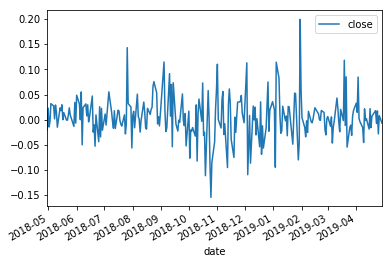

In [13]:
# Display chart of 1 year's worth of daily AMD returns
daily_return_1_year.plot()

### Plot 3 Years of Daily Returns

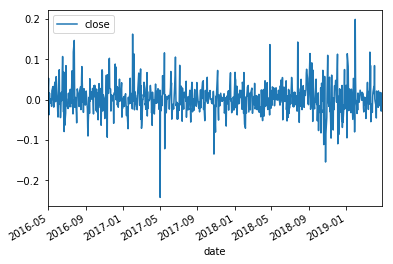

In [14]:
# Display chart of 3 year's worth of daily AMD returns
daily_return_3_year.plot()

### Plot 5 Years of Daily Returns

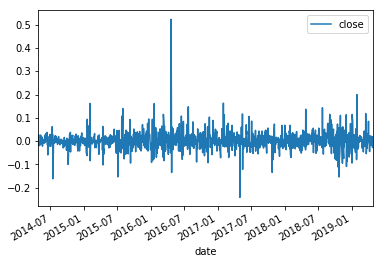

In [15]:
# Display chart of 5 year's worth of daily AMD returns
daily_return_5_year.plot()

### Plot 10 Years of Daily Returns

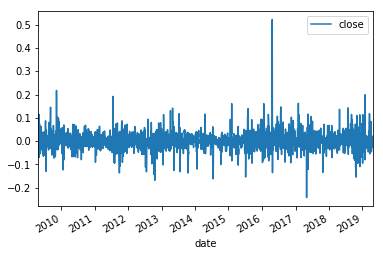

In [16]:
# Display chart of 10 year's worth of daily AMD returns
daily_return_10_year.plot()

### Analyze Daily Returns over Date Ranges

1. What are the average daily returns over each date range?

    * 1 Year = 0.04538 or 4.53%
    * 3 Year = 0.03455 or 3.45%
    * 5 Year = 0.02304 or 2.30%
    * 10 Year = 0.01488 or 1.49%
    
    
2. What insights could this provide in regards to wanting to trade AMD stock in the long-term vs. short-term? 

    The data shows that AMD had an average daily return over the last 1-year time frame of 0.004538, or 4.53%. This compares with long-term average daily returns of, for example, 3.45% for a 3 year horizon, and 1.49% for a 10 year horizon. By contrasting the short-run (1 year) trend against the long run trend (10 years), it’s apparent that AMD has had much stronger performance only recently.

    As to what this foretells for an investor looking to buy AMD stock now, however, is less clear: it’s possible that this 1-year performance signals a dramatic change in AMD’s business model, and that this strong performance will continue. On the other hand, the most recent year’s could just be an anomaly, and that performance for AMD will revert to its long run trend.

    A third and entirely alternative explanation is that the equity market overall experienced a boom over this last year, and that AMD—like all stocks in the market—rose in value. In the next unit, you will learn how to adjust for these market effects, so that you can evaluate stock performance from year-to-year on a more even measure.
